# Constructing grand-canonical phase diagram 
## for Hubbard chain with L = 40 and U = -7

In [22]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Parsing energies-file to pandas dataframe

lst = []
with open('W1_40_energies.txt') as f:
    for line in f:
        nup, ndown, e = re.findall(r'(?<== )[\d\.-]+', line)
        lst.append({'Nup':nup, 'Ndown':ndown, 'E':e})
df = pd.DataFrame(lst)
df.drop_duplicates(inplace = True)

# Converting data types

In [9]:
df['Nup'] = df.Nup.astype(int)
df['Ndown'] = df.Ndown.astype(int)
df['E'] = df.E.astype(np.float64)

# Finding coordinates of a multicritical point

In [10]:
e11_w1 = df[(df['Nup']==1) & (df['Ndown']==1)]['E'].values[0]
e10_w1 = df[(df['Nup']==1) & (df['Ndown']==0)]['E'].values[0]

# lines crossing 

h_w_1 = e10_w1 - e11_w1/2
mu_w_1 = e11_w1/2

In [11]:
h_w_1, mu_w_1

(2.0362266621815293, -4.030358264546855)

In [20]:
# Checking the exact formulas for E(1, 1) (hence (\mu_o, h_o) for W=1

U, t = 7, 1
mu_o = -np.sqrt(U**2 + (4*t)**2) / 2
h_o = -mu_o - 2*t


#fairly close to the calculation
h_o, mu_o, 

(2.0311288741492746, -4.031128874149275)

# Polaron line (horizontal)

In [15]:
l = list(range(3, 39))

In [16]:
mu_1_1, h_1_1 = [mu_w_1], [h_w_1]
for i in l:
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/2
    h = (df[(df['Nup']==i-1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/-2
    mu_1_1.append(mu)
    h_1_1.append(h)

# BCS line (vertical)

In [17]:
mu_1_2, h_1_2 = [mu_w_1], [h_w_1]
for i in l:
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==i+1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    h = (df[(df['Nup']==i+1) & (df['Ndown']==i-1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    mu_1_2.append(mu)
    h_1_2.append(h)

# Functions for linear borders

In [26]:
h11 = np.arange(h_1_2[0], 2.7, 0.1)
def mu1(h):
    return -h - 2.
h33 = np.arange(5.3, 7, 0.2)
def mu3(h):
    return -h + 1.9

(0.0, 7.0, -4.5, -3.5)

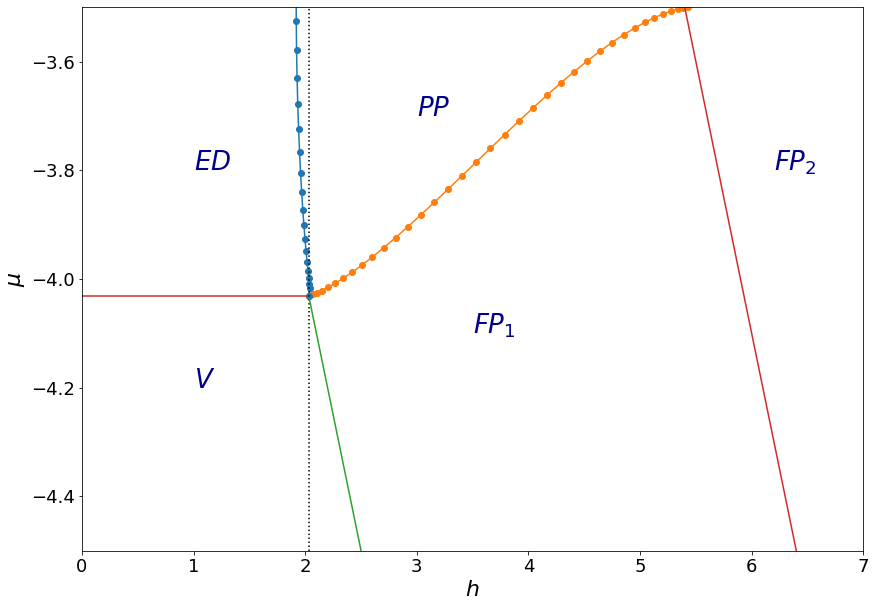

In [27]:
plt.figure(figsize=(14, 10))
plt.plot(h_1_1, mu_1_1, 'o-', color = '#ff7f0e')
plt.plot(h_1_2, mu_1_2, 'o-', color = '#1f77b4')
plt.axhline(y=mu_1_1[0], color='#d62728', xmax=h_1_2[0]-1.75)
plt.axvline(x=h_1_2[0], linestyle=':', color='black')
plt.plot(h11, mu1(h11), '-', color = '#2ca02c')
plt.plot(h33, mu3(h33), '-', color = '#d62728')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.text(1, -3.8, '$ED$', fontsize=26, color='darkblue')
plt.text(1, -4.2, '$V$', fontsize=26, color='darkblue')
plt.text(3., -3.7, '$PP$', fontsize=26, color='darkblue')
plt.text(3.5, -4.1, '$FP_1$', fontsize=26, color='darkblue')
plt.text(6.2, -3.8, '$FP_2$', fontsize=26, color='darkblue')
plt.xlabel('$h$', size=22)
plt.ylabel('$\mu$', size=22)
plt.axis([0, 7, -4.5, -3.5])
# plt.savefig('w=1')